In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

path = "/kaggle/input/chest-xray-augmented-2/Chest-Xray-Augmented-2"

train_path = path+'/train'
test_path = path+'/test'

os.listdir(path)

['test', 'train']

In [3]:
train_norm = len(os.listdir(train_path+'/NORMAL'))
train_pne = len(os.listdir(train_path+'/PNEUMONIA'))
print("Total number of images in train set", (train_norm+train_pne))

Total number of images in train set 6541


In [4]:
test_norm = len(os.listdir(test_path+'/NORMAL'))
test_pne = len(os.listdir(test_path+'/PNEUMONIA'))
print("Total number of images in test set", (test_norm+test_pne))

Total number of images in test set 1414


In [5]:
os.listdir(train_path)

['PNEUMONIA', 'NORMAL']

In [6]:
train_paths = []
train_labels = []

for label in os.listdir(train_path):
    for image in os.listdir(train_path+'/'+label):
        train_paths.append(train_path+label+'/'+image)
        train_labels.append(label)

In [7]:
test_paths = []
test_labels = []

for label in os.listdir(test_path):
    for image in os.listdir(test_path+'/'+label):
        test_paths.append(test_path+label+'/'+image)
        test_labels.append(label)

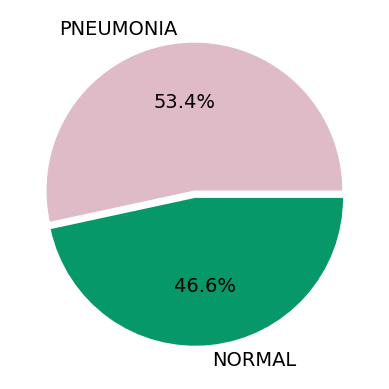

In [8]:
colors = ['#DFBBC7', '#069869']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='PNEUMONIA']),
         len([x for x in train_labels if x=='NORMAL'])],
        labels=['PNEUMONIA', 'NORMAL'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025))
plt.show()

In [9]:
test_paths = []
test_labels = []

for label in os.listdir(test_path):
    for image in os.listdir(test_path+'/'+label):
        test_paths.append(test_path+label+'/'+image)
        test_labels.append(label)

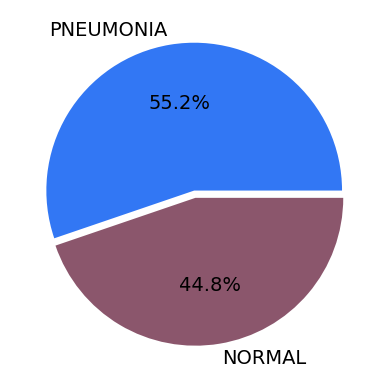

In [10]:
colors = ['#3277f4', '#8b566c']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in test_labels if x=='PNEUMONIA']),
         len([x for x in test_labels if x=='NORMAL'])],
        labels=['PNEUMONIA', 'NORMAL'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025))
plt.show()

In [11]:
def plot_image(path, title):
    image_filenames = os.listdir(path)
    fig, axs = plt.subplots(1, 4, figsize=(20,10))
    for i in range(4):
        image_data = plt.imread(path + '/' + image_filenames[i])
        print(image_data.shape)
        axs[i].imshow(image_data, cmap="gray")
        axs[i].set_title(title)
    plt.show()

(208, 176, 3)
(208, 176, 3)
(208, 176, 3)
(256, 256, 3)


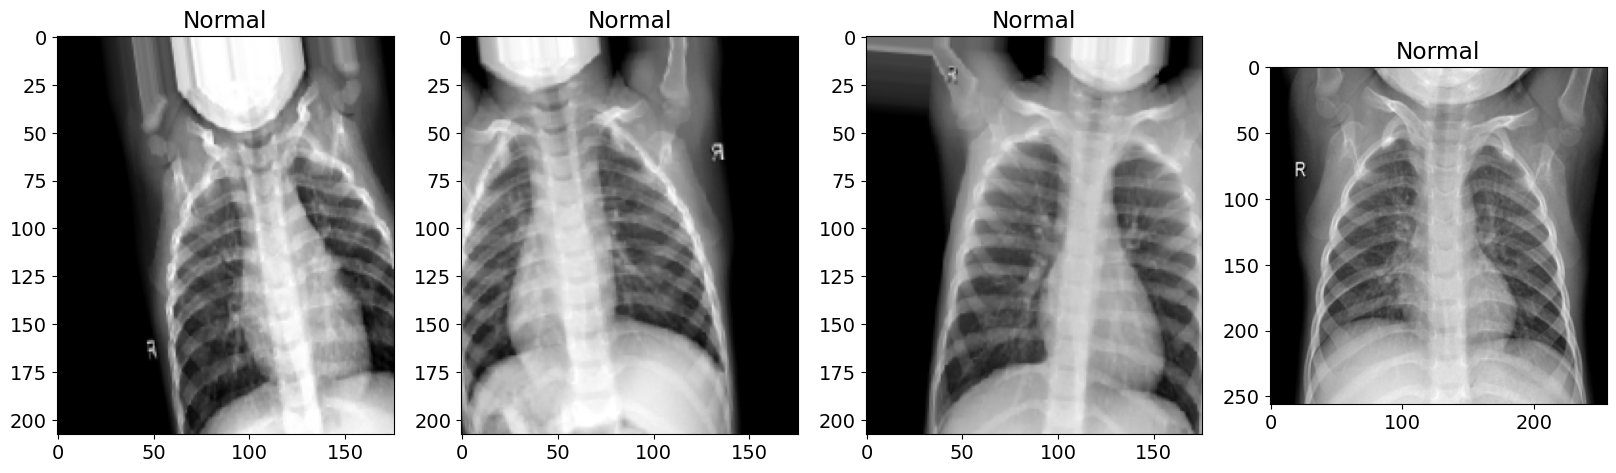

In [12]:
image_folder_path = train_path + '/NORMAL'
plot_image(image_folder_path, "Normal")

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


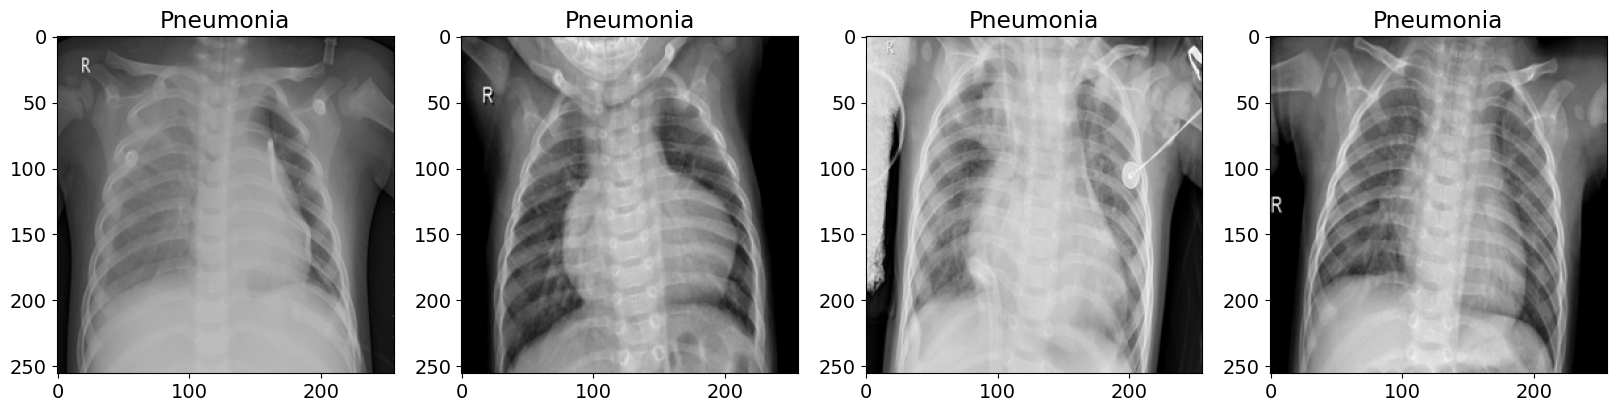

In [13]:
image_folder_path = train_path + '/PNEUMONIA'
plot_image(image_folder_path, "Pneumonia")

In [14]:
image_shape = (128,128,3)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=.1,
                               zoom_range = .1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [16]:
image_gen.flow_from_directory(train_path)

Found 6541 images belonging to 2 classes.


In [17]:
image_gen.flow_from_directory(test_path)

Found 1414 images belonging to 2 classes.


In [18]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=16,
                                                class_mode='binary')
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary',
                                               shuffle=False)

Found 6541 images belonging to 2 classes.
Found 1414 images belonging to 2 classes.


In [19]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=4, mode='min')

In [22]:
results = model.fit(train_image_gen, epochs=30,
                              validation_data = test_image_gen,
                              callbacks=[early_stop])

Epoch 1/30
409/409 [==============================] - 139s 335ms/step - loss: 0.7510 - accuracy: 0.8205 - val_loss: 0.4990 - val_accuracy: 0.7864
Epoch 2/30
409/409 [==============================] - 130s 317ms/step - loss: 0.3117 - accuracy: 0.8791 - val_loss: 0.4249 - val_accuracy: 0.8069
Epoch 3/30
409/409 [==============================] - 128s 313ms/step - loss: 0.2569 - accuracy: 0.9012 - val_loss: 0.2791 - val_accuracy: 0.8826
Epoch 4/30
409/409 [==============================] - 129s 314ms/step - loss: 0.2437 - accuracy: 0.9101 - val_loss: 0.2368 - val_accuracy: 0.9081
Epoch 5/30
409/409 [==============================] - 129s 315ms/step - loss: 0.2195 - accuracy: 0.9164 - val_loss: 0.2722 - val_accuracy: 0.8904
Epoch 6/30
409/409 [==============================] - 129s 315ms/step - loss: 0.2170 - accuracy: 0.9197 - val_loss: 0.2266 - val_accuracy: 0.9144
Epoch 7/30
409/409 [==============================] - 128s 314ms/step - loss: 0.2101 - accuracy: 0.9239 - val_loss: 0.2387 -

In [23]:
import pandas as pd
loss_df = pd.DataFrame(model.history.history)
loss_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

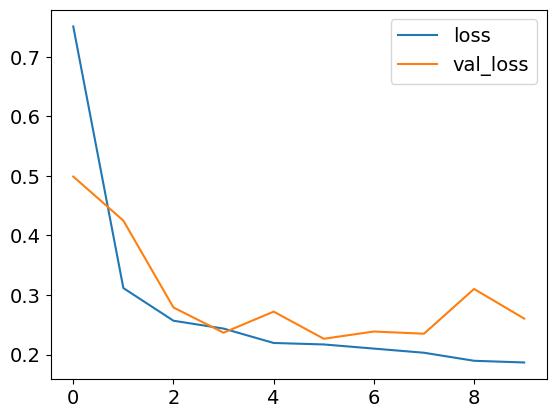

In [24]:
loss_df[['loss','val_loss']].plot()
plt.show()

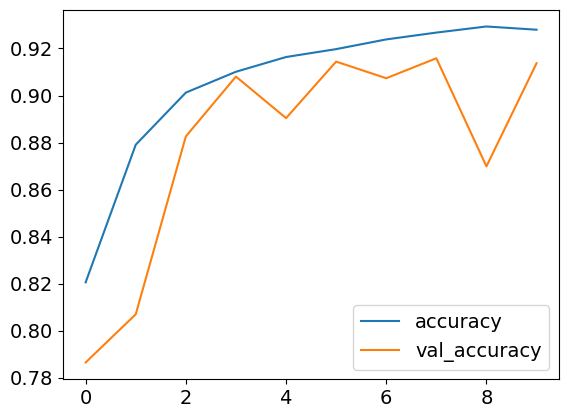

In [25]:
loss_df[['accuracy','val_accuracy']].plot()
plt.show()

In [26]:
model.evaluate(test_image_gen, verbose=0)

[0.2509152591228485, 0.9186704158782959]

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(test_image_gen)
y_pred = y_pred.round()
y_true = test_image_gen.classes
print(classification_report(y_true,y_pred))

89/89 [==============================] - 14s 157ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       633
           1       0.96      0.89      0.92       781

    accuracy                           0.92      1414
   macro avg       0.92      0.92      0.92      1414
weighted avg       0.92      0.92      0.92      1414



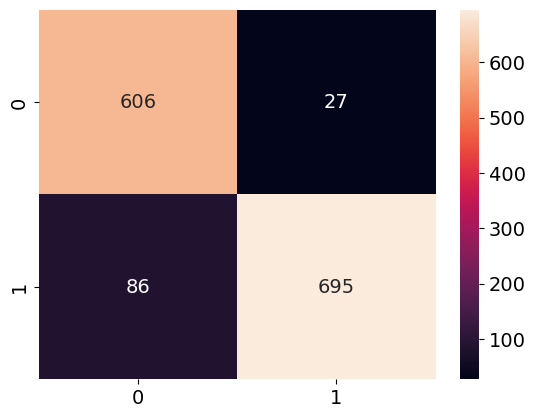

In [28]:
import seaborn as sns
cnf = confusion_matrix(y_true,y_pred)
sns.heatmap(cnf, annot=True, fmt='g')
plt.show()